# UNGDC
## General Exploratory Data Analysis 
### Unstructured Data Analytics, Spring 2020 <br>

Laura Goyeneche  <br>
Lindsay Graff    <br>
Jana Macickova   <br>
Ashita Vadlamudi <br>

Heinz College of Information Systems and Public Policy <br>
Carnegie Mellon University

In [10]:
# Libraries 
import re
import itertools
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

import wordcloud
from wordcloud import WordCloud

from nltk.util import ngrams
from nltk import bigrams
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import networkx as nx

from ipynb.fs.full.uda_functions import txtTrans

%matplotlib inline
plt.style.use('seaborn')

In [11]:
# Import dataset 
df = pd.read_csv('final_df.csv', sep = ',', header = 0)
df = df.drop('Unnamed: 0', axis = 1)

### Data preparation

In [12]:
# Define words to omit
omitW    = ['united','nations','general','assembly','international','country','nation','world','states','session','organization','mr','president','per','cent','today','may','even','thu','time','also','one','must','would','however','need','therefore','us','well','result','countries']
stopW    = set(stopwords.words('english'))
stopWadd = set(omitW) 
stopW    = stopW.union(stopWadd)

In [13]:
# Features generation
df['decade'] = np.where((df.year < 1980), '70s', np.where((df.year >=1980) & (df.year < 1990), '80s', np.where((df.year >= 1990) & (df.year < 2000), '90s','00s')))

In [14]:
# Define 
decades = Counter()
for i,j in enumerate(np.unique(df.decade)):
    temp  = ' '.join(df.statement[df.decade == j])
    text  = re.sub(r'\S*\d\S*','', temp) 
    text  = re.sub(r'[^\w\s]','' , text)         
    text  = text.lower().split()
    
    decades[j] = text

### Missigness patterns

## 1. General

In [15]:
print('Total number of statements:', df.shape[0])

Total number of statements: 7354


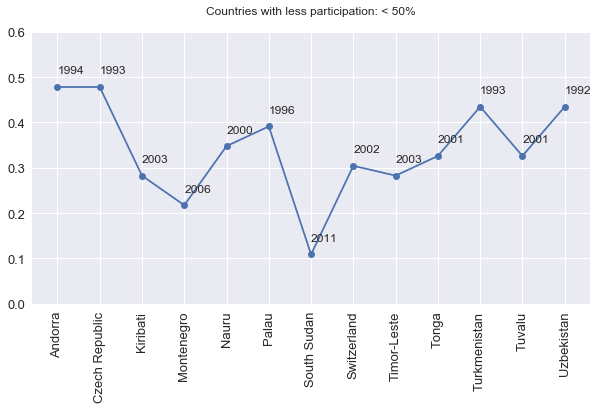

In [16]:
temp    = np.unique(df.country_name, return_counts = True)
tempidx = np.where(np.unique(df.country_name, return_counts = True)[1]/46 < 0.5)[0]
tempmin = list(df.groupby('country_name')['year'].min().iloc[tempidx])

plt.figure(figsize = (10, 5))
plt.plot(temp[0][tempidx], temp[1][tempidx]/46, 'o-')
plt.title('Countries with less participation: < 50%\n')
for i, txt in enumerate(tempmin): plt.text(temp[0][tempidx][i], temp[1][tempidx][i]/46 + 0.03, txt, size = 12)
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 13)
plt.ylim(0,0.6)
plt.show()

### 1.1. Participation of countries across time

### 1.2. Length of the speech across years and country

### 1.3. World clouds by decades

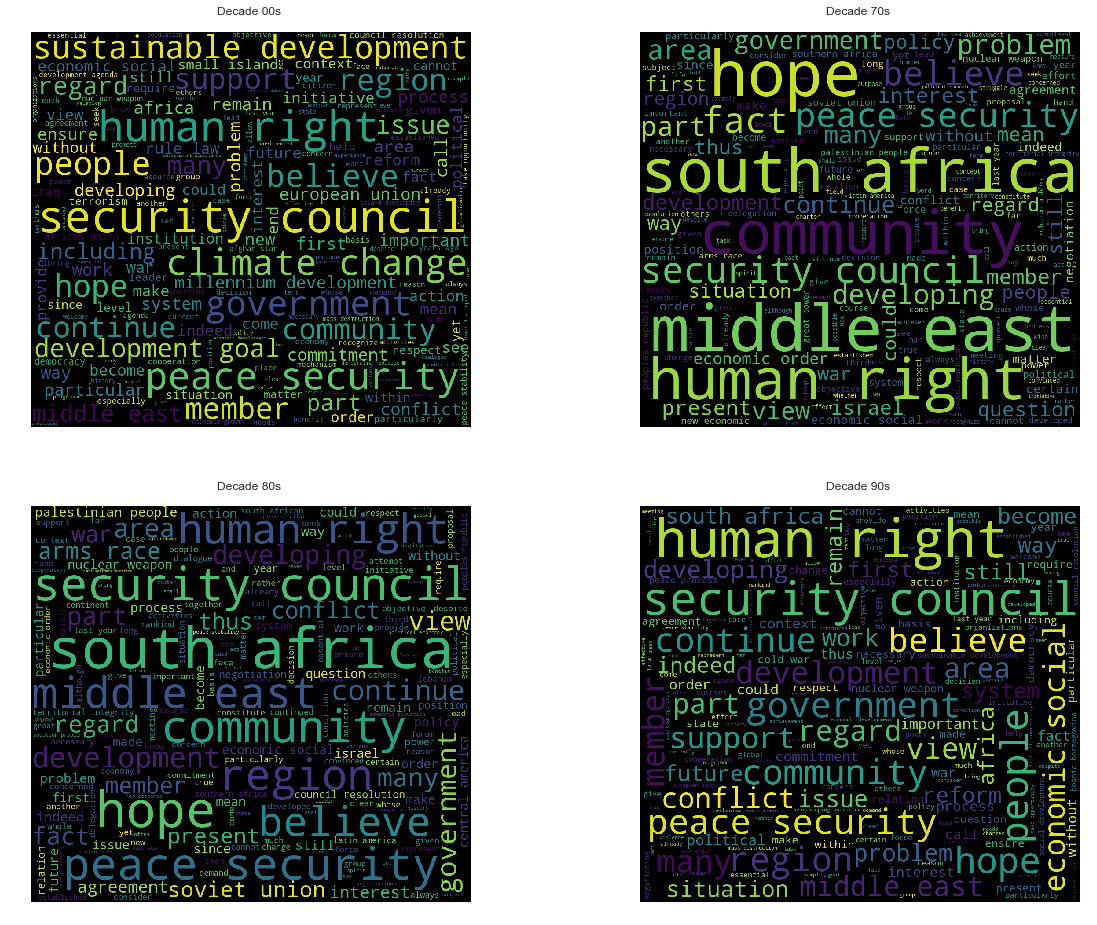

In [17]:
plt.figure(figsize = (20,16))

for i,j in enumerate(np.unique(df.decade)):
    
    words     = ' '.join(decades[j])
    wordcloud = WordCloud(width = 1000, height = 900, stopwords = stopW).generate(words) 
    
    plt.subplot(2,2,i+1)
    plt.plot()
    plt.imshow(wordcloud) 
    plt.title('Decade ' + j + ' \n')
    plt.axis("off")

### 1.4. Most frequent n-grams by decades

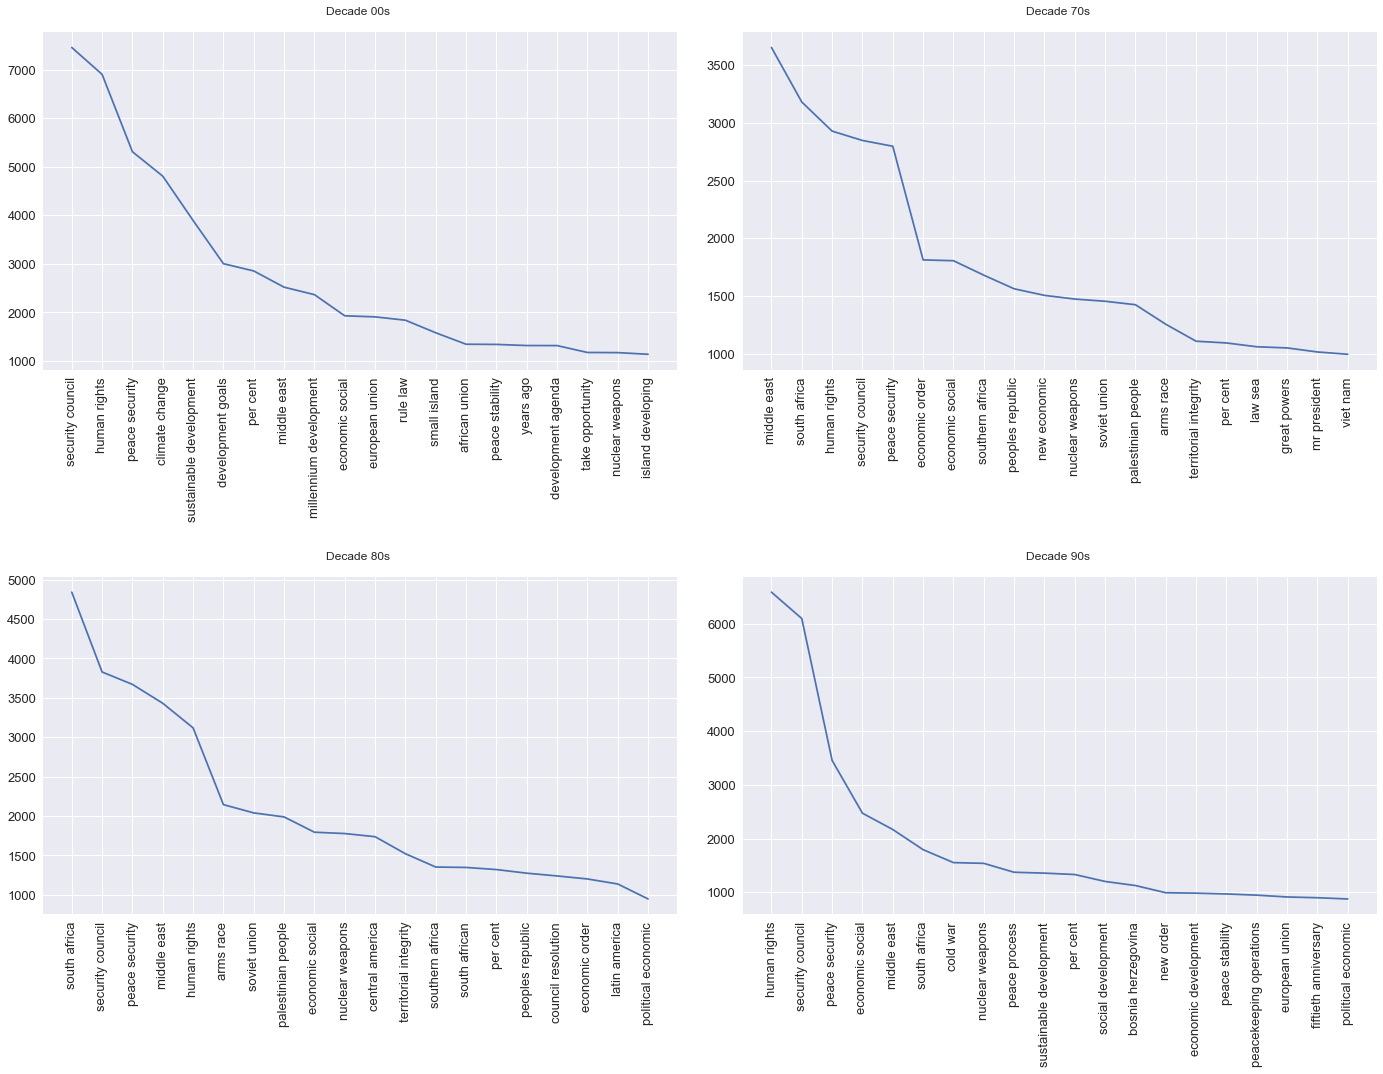

In [9]:
plt.figure(figsize = (20,15))

for i,j in enumerate(np.unique(df.decade)):
    bifreq = Counter(ngrams([w for w in decades[j] if w not in stopW],2))
    freq20 = pd.DataFrame(bifreq.most_common(20))
    
    freq20['text'] = freq20[0].apply(lambda x: ' '.join(x))
    
    plt.subplot(2,2,i+1)
    plt.plot(freq20.text, freq20[1])
    plt.tight_layout(pad = 3.0)
    plt.title('Decade ' + j + ' \n')
    plt.xticks(rotation = 90)
    plt.tick_params(labelsize = 13)

### 1.5. Part of the speech analysis

## 2. Detail analysis

### 2.1. Regional trends

### 2.2. Income level trends